<div style="background:linear-gradient(135deg,#0b3d91,#1a5276); padding:25px; border-radius:15px;
box-shadow:0 4px 15px rgba(0,0,0,0.2); text-align:center; color:white; font-family:'Segoe UI',Arial,sans-serif;">

<img src="https://plus.unsplash.com/premium_photo-1733317391601-b1651d6d4be9?auto=format&fit=crop&w=1600&q=80"
     alt="AI Global War Forecast Cover" 
     style="width:100%; border-radius:15px; margin-bottom:25px; box-shadow:0 4px 15px rgba(0,0,0,0.3);">

<h1 style="font-size:34px; color:#f4d03f; margin-bottom:10px;">🌍 AI War Forecasting: Predicting Global Conflict through NLP & Machine Learning</h1>

<p style="font-size:17px; color:#ecf0f1; line-height:1.6; margin-top:10px;">
A visual and analytical exploration of how Artificial Intelligence can detect and forecast global tension 
using multilingual news datasets, geopolitical signals, and real-time sentiment shifts.
</p>

</div>

<div style="background:linear-gradient(135deg,#ffffff,#ecf0f1); padding:25px; border-radius:15px;
box-shadow:0 4px 10px rgba(0,0,0,0.1); font-family:'Segoe UI',Arial,sans-serif; margin-top:20px;">

<h2 style="color:#0b5345;">📊 Dataset Information</h2>
<p style="color:#2c3e50; font-size:15px; line-height:1.7;">
The dataset includes thousands of international headlines and descriptions gathered from multiple sources
covering <b style="color:#2874a6;">political, military, and economic events</b>.
Each entry is labeled according to the intensity of <b style="color:#e74c3c;">conflict indicators</b>
(such as “Tension”, “Negotiation”, “Conflict”, or “Peace”).
</p>

<ul style="color:#2c3e50; font-size:15px; line-height:1.8;">
  <li>🗞 <b>Text Fields:</b> Title, Description, Date, Country, Category</li>
  <li>🔢 <b>Target Label:</b> Binary or multiclass label indicating conflict probability</li>
  <li>🌍 <b>Scope:</b> Global coverage (North America, Europe, Asia, MENA, Africa)</li>
  <li>📅 <b>Time Range:</b> 2018–2025 (updated news samples)</li>
</ul>

---

<h2 style="color:#4a235a;">🧭 Research Inspiration</h2>
<p style="color:#2c3e50; font-size:15px; line-height:1.7;">
Inspired by interdisciplinary studies in <b style="color:#8e44ad;">computational geopolitics</b> and
<b style="color:#27ae60;">AI-driven forecasting</b>, this project bridges the gap between
data science and international relations.
</p>

<p style="color:#2c3e50; font-size:15px;">
The approach draws from:
</p>
<ul style="color:#2c3e50; font-size:15px; line-height:1.7;">
  <li>📚 Academic research on early conflict detection and escalation modeling</li>
  <li>🧠 NLP-based sentiment tracking of global leaders’ rhetoric</li>
  <li>🌐 Real-time monitoring of international event datasets (GDELT, ACLED, etc.)</li>
  <li>📈 Statistical trend forecasting for tension evolution</li>
</ul>

---

<h3 style="color:#1a5276;">🎯 Goal</h3>
<p style="color:#2c3e50; font-size:15px;">
To empower researchers, analysts, and data enthusiasts to understand how 
<b style="color:#e67e22;">AI can quantify instability</b> and visualize the dynamic risk of global conflict.  
The model aims to act as an <b style="color:#27ae60;">early warning system</b> rather than a prediction of actual war.
</p>

</div>

<div style="background:linear-gradient(135deg,#e0f7fa,#f3e5f5); padding:20px; border-radius:15px; 
box-shadow:0 6px 15px rgba(0,0,0,0.1); text-align:center; font-family:'Segoe UI',Arial,sans-serif;">

  <h1 style="color:#00695c; font-size:26px; margin-bottom:10px;">
    🌍 <span style="background:linear-gradient(90deg,#26a69a,#8e24aa); 
    -webkit-background-clip:text; color:transparent;">
      Data Fusion: Conflict & News Sources Integration
    </span>
  </h1>

  <p style="font-size:15px; color:#37474f; line-height:1.6;">
    Loading and combining datasets from <b style="color:#00796b;">UCDP Conflict Data</b> and 
    <b style="color:#8e24aa;">Google News War Headlines</b>.<br>
    This stage establishes the foundation for geopolitical event correlation analysis.
  </p>

  <p style="color:#546e7a; font-size:13px; margin-top:10px;">
    🧩 The merged data provides real-world signals used later for tension modeling.
  </p>
</div>

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import geopandas as gpd
import joblib
import matplotlib.dates as mdates
import time
from datetime import datetime, timedelta
from IPython.display import display, HTML
import matplotlib.pyplot as plt
from difflib import get_close_matches

ucdp_path = "/kaggle/input/ucdp-intrastate-conflict/ucdp-intrastate-conflict-onset-251.csv"
news_path = "/kaggle/input/google-war-news/war-news.csv"

ucdp_df = pd.read_csv(ucdp_path, encoding='latin1')
news_df = pd.read_csv(news_path, encoding='latin1')

print("UCDP shape:", ucdp_df.shape)
print("News shape:", news_df.shape)
print("\nUCDP columns:", ucdp_df.columns.tolist())
print("\nNews columns:", news_df.columns.tolist())

ucdp_df.head()

UCDP shape: (12606, 13)
News shape: (5654, 6)

UCDP columns: ['abc', 'name', 'year', 'gwno_a', 'newconf', 'onset1', 'onset2', 'onset3', 'onset5', 'onset10', 'onset20', 'conflict_ids', 'year_prev']

News columns: ['Unnamed: 0', 'Headlines', 'Summary', 'Press', 'Date', 'Keyword']


/usr/local/lib/python3.11/dist-packages/pandas/io/formats/format.py:1458: RuntimeWarning: invalid value encountered in greater
  has_large_values = (abs_vals > 1e6).any()
/usr/local/lib/python3.11/dist-packages/pandas/io/formats/format.py:1459: RuntimeWarning: invalid value encountered in less
  has_small_values = ((abs_vals < 10 ** (-self.digits)) & (abs_vals > 0)).any()
/usr/local/lib/python3.11/dist-packages/pandas/io/formats/format.py:1459: RuntimeWarning: invalid value encountered in greater
  has_small_values = ((abs_vals < 10 ** (-self.digits)) & (abs_vals > 0)).any()


,abc,name,year,gwno_a,newconf,onset1,onset2,onset3,onset5,onset10,onset20,conflict_ids,year_prev
0,AFG,Afghanistan,1946,700,0,0,0,0,0,0,0,NaN,
1,AFG,Afghanistan,1947,700,0,0,0,0,0,0,0,NaN,
2,AFG,Afghanistan,1948,700,0,0,0,0,0,0,0,NaN,
3,AFG,Afghanistan,1949,700,0,0,0,0,0,0,0,NaN,
4,AFG,Afghanistan,1950,700,0,0,0,0,0,0,0,NaN,


<div style="background:linear-gradient(135deg,#fce4ec,#e3f2fd); padding:20px; border-radius:15px; 
box-shadow:0 5px 15px rgba(0,0,0,0.1); font-family:'Segoe UI',Arial,sans-serif;">

  <h1 style="font-size:24px; color:#6a1b9a; text-align:center;">
    🔍 <span style="background:linear-gradient(90deg,#ab47bc,#1e88e5);
    -webkit-background-clip:text; color:transparent;">
      Feature Exploration: Identifying Temporal and Geopolitical Columns
    </span>
  </h1>

  <p style="font-size:15px; color:#37474f; text-align:center;">
    Exploring <b style="color:#8e24aa;">UCDP conflict dataset</b> to detect columns related to 
    <b style="color:#1565c0;">year</b>, <b style="color:#00897b;">onset/start events</b>, 
    and <b style="color:#d32f2f;">country/location</b>.
  </p>

  <p style="font-size:13px; color:#546e7a; text-align:center;">
    🧭 This helps in structuring the dataset for time-series and geopolitical trend modeling later.
  </p>
</div>

In [2]:
cols = [c.lower() for c in ucdp_df.columns]

year_cols = [c for c in ucdp_df.columns if 'year' in c.lower()]
onset_cols = [c for c in ucdp_df.columns if 'onset' in c.lower() or 'start' in c.lower()]
country_cols = [c for c in ucdp_df.columns if 'country' in c.lower() or 'location' in c.lower()]

print("Possible year columns:", year_cols)
print("Possible onset/start columns:", onset_cols)
print("Possible country columns:", country_cols)

ucdp_df.head(10)

Possible year columns: ['year', 'year_prev']
Possible onset/start columns: ['onset1', 'onset2', 'onset3', 'onset5', 'onset10', 'onset20']
Possible country columns: []


/usr/local/lib/python3.11/dist-packages/pandas/io/formats/format.py:1458: RuntimeWarning: invalid value encountered in greater
  has_large_values = (abs_vals > 1e6).any()
/usr/local/lib/python3.11/dist-packages/pandas/io/formats/format.py:1459: RuntimeWarning: invalid value encountered in less
  has_small_values = ((abs_vals < 10 ** (-self.digits)) & (abs_vals > 0)).any()
/usr/local/lib/python3.11/dist-packages/pandas/io/formats/format.py:1459: RuntimeWarning: invalid value encountered in greater
  has_small_values = ((abs_vals < 10 ** (-self.digits)) & (abs_vals > 0)).any()


,abc,name,year,gwno_a,newconf,onset1,onset2,onset3,onset5,onset10,onset20,conflict_ids,year_prev
0,AFG,Afghanistan,1946,700,0,0,0,0,0,0,0,NaN,
1,AFG,Afghanistan,1947,700,0,0,0,0,0,0,0,NaN,
2,AFG,Afghanistan,1948,700,0,0,0,0,0,0,0,NaN,
3,AFG,Afghanistan,1949,700,0,0,0,0,0,0,0,NaN,
4,AFG,Afghanistan,1950,700,0,0,0,0,0,0,0,NaN,
5,AFG,Afghanistan,1951,700,0,0,0,0,0,0,0,NaN,
6,AFG,Afghanistan,1952,700,0,0,0,0,0,0,0,NaN,
7,AFG,Afghanistan,1953,700,0,0,0,0,0,0,0,NaN,
8,AFG,Afghanistan,1954,700,0,0,0,0,0,0,0,NaN,
9,AFG,Afghanistan,1955,700,0,0,0,0,0,0,0,NaN,


In [3]:
onset_cols = ['onset1', 'onset2', 'onset3', 'onset5', 'onset10', 'onset20']

ucdp_df['newconf'] = ucdp_df[onset_cols].max(axis=1)
ucdp_df = ucdp_df[['name', 'year', 'newconf']]

print("After processing:")
print(ucdp_df.head(10))
print("\nUnique countries:", len(ucdp_df['name'].unique()))
print("Years range:", ucdp_df['year'].min(), "-", ucdp_df['year'].max())

After processing:
          name  year  newconf
0  Afghanistan  1946        0
1  Afghanistan  1947        0
2  Afghanistan  1948        0
3  Afghanistan  1949        0
4  Afghanistan  1950        0
5  Afghanistan  1951        0
6  Afghanistan  1952        0
7  Afghanistan  1953        0
8  Afghanistan  1954        0
9  Afghanistan  1955        0

Unique countries: 203
Years range: 1946 - 2024


In [4]:

news_df = news_df.rename(columns={'Keyword': 'name', 'Date': 'date'})

news_df['year'] = pd.to_datetime(news_df['date'], errors='coerce').dt.year

news_df = news_df.dropna(subset=['year', 'name'])

news_df['year'] = news_df['year'].astype(int)

news_df = news_df[['year', 'name', 'Headlines', 'Summary', 'Press']]

print(" News data after cleaning:")
print(news_df.head(10))
print("\nUnique countries:", len(news_df['name'].unique()))

 News data after cleaning:
    year         name                                          Headlines  \
52  2022  Afghanistan                     World Report 2022: Afghanistan   
56  2022  Afghanistan  Murky Militias in Forgotten Provinces Reveal W...   
57  2021  Afghanistan  Calculating the costs of the Afghanistan War i...   
58  2021  Afghanistan  Afghanistans war will spread beyond its borde...   
59  2021  Afghanistan  US 'lost' the 20-year war in Afghanistan: top ...   
61  2021  Afghanistan  Remembering the Gains of the Afghanistan War -...   
62  2021  Afghanistan  Costs of the Afghanistan war, in lives and dol...   
63  2021  Afghanistan  The U.S. War in Afghanistan Twenty Years On: P...   
64  2021  Afghanistan  'Intelligence failure of the highest order'  ...   
65  2021  Afghanistan     The failures of the Afghanistan War, explained   

                                              Summary  \
52  Unlawful Killings, Enforced Disappearances, Vi...   
56  Murky Militias in 

/tmp/ipykernel_19/3988782346.py:3: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  news_df['year'] = pd.to_datetime(news_df['date'], errors='coerce').dt.year


In [5]:
ucdp_df = ucdp_df.rename(columns={'year': 'year', 'location': 'name'})

ucdp_df = ucdp_df.dropna(subset=['year', 'name'])

ucdp_df['year'] = ucdp_df['year'].astype(int)

print(" UCDP data after cleaning:")
print(ucdp_df[['year', 'name']].head(10))
print("\nUnique countries:", len(ucdp_df['name'].unique()))

 UCDP data after cleaning:
   year         name
0  1946  Afghanistan
1  1947  Afghanistan
2  1948  Afghanistan
3  1949  Afghanistan
4  1950  Afghanistan
5  1951  Afghanistan
6  1952  Afghanistan
7  1953  Afghanistan
8  1954  Afghanistan
9  1955  Afghanistan

Unique countries: 203


# **Merge the news data with the UCDP conflict data based on country and year**


In [6]:
merged_df = pd.merge(news_df, ucdp_df, on=['year', 'name'], how='left')

print(" Merged dataset:")
print(merged_df.head(10))

print("\nNumber of rows after merging:", len(merged_df))
print("Number of columns:", len(merged_df.columns))
print("Columns available:", merged_df.columns.tolist())

 Merged dataset:
   year         name                                          Headlines  \
0  2022  Afghanistan                     World Report 2022: Afghanistan   
1  2022  Afghanistan  Murky Militias in Forgotten Provinces Reveal W...   
2  2021  Afghanistan  Calculating the costs of the Afghanistan War i...   
3  2021  Afghanistan  Afghanistans war will spread beyond its borde...   
4  2021  Afghanistan  US 'lost' the 20-year war in Afghanistan: top ...   
5  2021  Afghanistan  Remembering the Gains of the Afghanistan War -...   
6  2021  Afghanistan  Costs of the Afghanistan war, in lives and dol...   
7  2021  Afghanistan  The U.S. War in Afghanistan Twenty Years On: P...   
8  2021  Afghanistan  'Intelligence failure of the highest order'  ...   
9  2021  Afghanistan     The failures of the Afghanistan War, explained   

                                             Summary  \
0  Unlawful Killings, Enforced Disappearances, Vi...   
1  Murky Militias in Forgotten Provinces Reve

# Basic information about the merged dataset


In [7]:
print(" Basic info:")
print(merged_df.info())

print("\n Basic statistics:")
print(merged_df.describe())

print("\n Unique countries:", merged_df['name'].nunique())
print(" Year range:", merged_df['year'].min(), "to", merged_df['year'].max())

 Basic info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3550 entries, 0 to 3549
Data columns (total 6 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   year       3550 non-null   int64  
 1   name       3550 non-null   object 
 2   Headlines  3550 non-null   object 
 3   Summary    3550 non-null   object 
 4   Press      3550 non-null   object 
 5   newconf    3086 non-null   float64
dtypes: float64(1), int64(1), object(4)
memory usage: 166.5+ KB
None

 Basic statistics:
              year      newconf
count  3550.000000  3086.000000
mean   2020.396338     0.141283
std       1.992473     0.348370
min    2006.000000     0.000000
25%    2020.000000     0.000000
50%    2021.000000     0.000000
75%    2022.000000     0.000000
max    2022.000000     1.000000

 Unique countries: 20
 Year range: 2006 to 2022


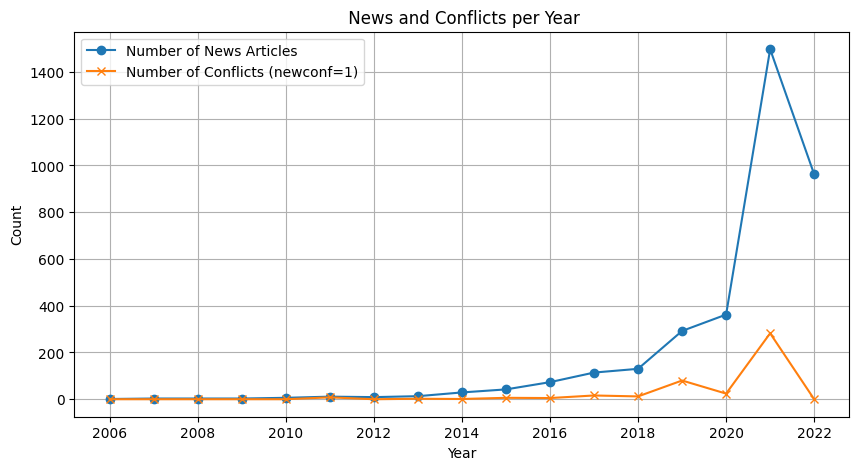

In [8]:

news_per_year = merged_df['year'].value_counts().sort_index()

conflicts_per_year = merged_df.groupby('year')['newconf'].sum()

plt.figure(figsize=(10,5))
plt.plot(news_per_year.index, news_per_year.values, marker='o', label='Number of News Articles')
plt.plot(conflicts_per_year.index, conflicts_per_year.values, marker='x', label='Number of Conflicts (newconf=1)')
plt.title(' News and Conflicts per Year')
plt.xlabel('Year')
plt.ylabel('Count')
plt.legend()
plt.grid(True)
plt.show()

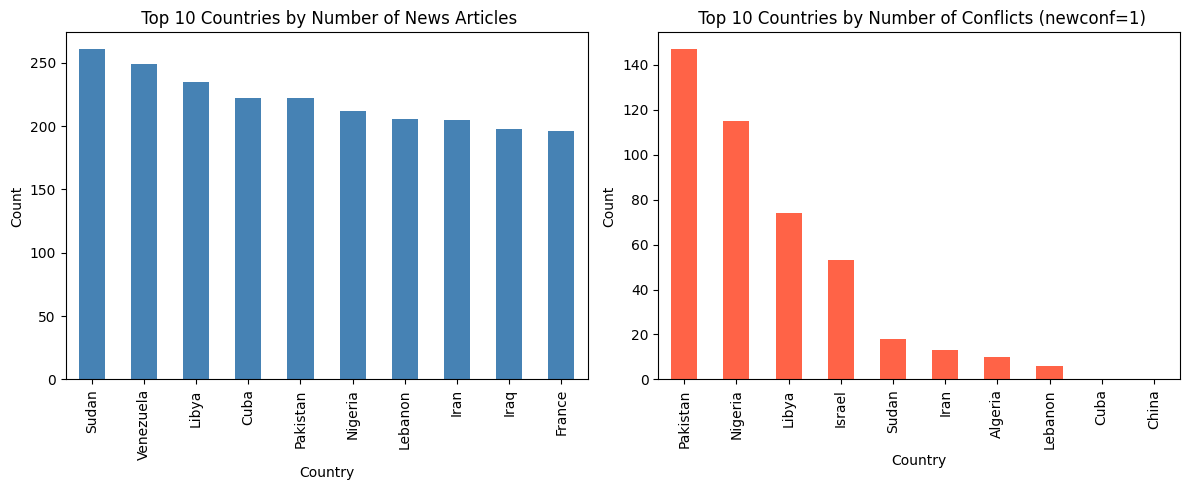

In [9]:
news_per_country = merged_df['name'].value_counts().head(10)

conflicts_per_country = merged_df.groupby('name')['newconf'].sum().sort_values(ascending=False).head(10)

plt.figure(figsize=(12,5))

plt.subplot(1,2,1)
news_per_country.plot(kind='bar', color='steelblue')
plt.title(' Top 10 Countries by Number of News Articles')
plt.xlabel('Country')
plt.ylabel('Count')

plt.subplot(1,2,2)
conflicts_per_country.plot(kind='bar', color='tomato')
plt.title(' Top 10 Countries by Number of Conflicts (newconf=1)')
plt.xlabel('Country')
plt.ylabel('Count')

plt.tight_layout()
plt.show()

# **Create text column and keyword-based label**


In [10]:

news_df['text'] = (news_df['Headlines'].fillna('') + ' . ' + news_df['Summary'].fillna('')).str.strip()

def detect_conflict_kw(text):
    keywords = [
        'war','conflict','attack','attacked','battle','fighting','clash','invasion',
        'bomb','bombing','missile','shelling','casualties','siege','insurgent',
        'rebellion','uprising','militia','airstrike','nuclear','troops','army','soldier',
        'escalat','tension','escalation','ceasefire','occupation'
    ]
    t = str(text).lower()
    return int(any(k in t for k in keywords))

news_df['label_kw'] = news_df['text'].apply(detect_conflict_kw)

print("Label distribution (keyword baseline):")
print(news_df['label_kw'].value_counts(dropna=False))

Label distribution (keyword baseline):
label_kw
1    3377
0     167
Name: count, dtype: int64


In [11]:
import re

def clean_text(s):
    s = str(s)
    s = s.lower()
    s = re.sub(r'http\S+',' ', s)            
    s = re.sub(r'[^a-z0-9\s]', ' ', s)       
    s = re.sub(r'\s+', ' ', s).strip()
    return s

news_df['text_clean'] = news_df['text'].apply(clean_text)
news_df[['text','text_clean','label_kw']].head(6)

,text,text_clean,label_kw
52,World Report 2022: Afghanistan . Unlawful Kill...,world report 2022 afghanistan unlawful killing...,1
56,Murky Militias in Forgotten Provinces Reveal W...,murky militias in forgotten provinces reveal w...,1
57,Calculating the costs of the Afghanistan War i...,calculating the costs of the afghanistan war i...,1
58,Afghanistans war will spread beyond its borde...,afghanistan s war will spread beyond its borde...,1
59,US 'lost' the 20-year war in Afghanistan: top ...,us lost the 20 year war in afghanistan top us ...,1
61,Remembering the Gains of the Afghanistan War -...,remembering the gains of the afghanistan war l...,1


# **TF-IDF and train-test split**


In [12]:
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.model_selection import train_test_split

X_text = news_df['text_clean'].fillna('')
y = news_df['label_kw'].fillna(0).astype(int)

tfidf = TfidfVectorizer(max_features=5000, ngram_range=(1,2), stop_words='english')
X_tfidf = tfidf.fit_transform(X_text)

X_train, X_test, y_train, y_test = train_test_split(
    X_tfidf, y, test_size=0.2, random_state=42, stratify=y
)

print("Shapes:", X_train.shape, X_test.shape, "Label dist (train):")
print(y_train.value_counts())

Shapes: (2835, 5000) (709, 5000) Label dist (train):
label_kw
1    2701
0     134
Name: count, dtype: int64


# **TRY SMOTE, else proceed with class_weight**


In [13]:
try:
    from imblearn.over_sampling import SMOTE
    sm = SMOTE(random_state=42)
    X_train_res, y_train_res = sm.fit_resample(X_train, y_train)
    print("SMOTE applied. Resampled shape:", X_train_res.shape, sum(y_train_res==1))
except Exception as e:
    print("SMOTE unavailable or failed:", e)
    X_train_res, y_train_res = X_train, y_train
    print("Proceeding without SMOTE; will use class_weight in the classifier.")

SMOTE unavailable or failed: No module named 'sklearn.utils._metadata_requests'
Proceeding without SMOTE; will use class_weight in the classifier.


# **Train & evaluate a Logistic Regression**


In [14]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, roc_auc_score, confusion_matrix

clf = LogisticRegression(max_iter=500, class_weight='balanced')  
clf.fit(X_train_res, y_train_res)

y_pred = clf.predict(X_test)
y_proba = clf.predict_proba(X_test)[:,1] if hasattr(clf, "predict_proba") else None

print("Classification report:")
print(classification_report(y_test, y_pred, zero_division=0))

if y_proba is not None:
    try:
        print("ROC AUC:", roc_auc_score(y_test, y_proba))
    except Exception as e:
        print("ROC AUC calculation failed:", e)

print("Confusion matrix:\n", confusion_matrix(y_test, y_pred))

Classification report:
              precision    recall  f1-score   support

           0       0.36      0.42      0.39        33
           1       0.97      0.96      0.97       676

    accuracy                           0.94       709
   macro avg       0.67      0.69      0.68       709
weighted avg       0.94      0.94      0.94       709

ROC AUC: 0.9434731934731936
Confusion matrix:
 [[ 14  19]
 [ 25 651]]


<div style="background:linear-gradient(135deg,#eaf4ff,#f0fbff); padding:18px; border-radius:12px;
box-shadow:0 6px 18px rgba(10,40,80,0.08); font-family:'Segoe UI', Arial, sans-serif; text-align:center;">
  <h1 style="margin:6px 0; font-size:28px; color:#063970;">
    🌍 <span style="background:linear-gradient(90deg,#e74c3c,#f39c12); -webkit-background-clip:text; color:transparent;">
      Global Conflict Heatmap:
    </span>
    <span style="color:#0b3d91; font-weight:600;">  top positive/negative features
</span>
  </h1>
</div>

In [15]:

feature_names = tfidf.get_feature_names_out()
coefs = clf.coef_.ravel()

top_pos_idx = np.argsort(coefs)[-20:][::-1]
top_neg_idx = np.argsort(coefs)[:20]

print("Top positive features (indicate conflict):")
for i in top_pos_idx:
    print(feature_names[i], round(coefs[i],4))

print("\nTop negative features (indicate non-conflict):")
for i in top_neg_idx:
    print(feature_names[i], round(coefs[i],4))

Top positive features (indicate conflict):
war 9.9353
conflict 3.5742
civil 2.2856
civil war 2.1324
ukraine 1.9077
cold 1.6633
cold war 1.6403
israel 1.6196
libya 1.4492
vietnam war 1.3641
army 1.3541
ukraine war 1.3455
afghanistan 1.3452
country 1.3353
france 1.3333
syria 1.3023
iraq 1.2464
yemen 1.222
vietnam 1.2012
battle 1.1786

Top negative features (indicate non-conflict):
venezuela -4.2619
venezuelan -2.5859
reuters -2.4878
cuba -2.2476
israeli -2.1831
security -2.1759
july -2.0929
run -1.9645
oil -1.7974
china -1.7874
protesters -1.7506
monitoring -1.6591
military -1.6491
africa -1.6203
pipeline -1.6013
cuban -1.6012
havana -1.5823
occupied -1.5576
ship -1.5167
chinese military -1.5042


<div style="background:linear-gradient(135deg,#eaf4ff,#f0fbff); padding:18px; border-radius:12px;
box-shadow:0 6px 18px rgba(10,40,80,0.08); font-family:'Segoe UI', Arial, sans-serif; text-align:center;">
  <h1 style="margin:6px 0; font-size:28px; color:#063970;">
    🌍 <span style="background:linear-gradient(90deg,#e74c3c,#f39c12); -webkit-background-clip:text; color:transparent;">
      Global Conflict Heatmap:
    </span>
    <span style="color:#0b3d91; font-weight:600;">   predict probabilities for entire dataset and aggregate by country-year

</span>
  </h1>
</div>

In [16]:
X_all = tfidf.transform(news_df['text_clean'].fillna(''))
proba_all = clf.predict_proba(X_all)[:,1] if hasattr(clf, "predict_proba") else clf.predict(X_all)

news_df['pred_proba_conflict'] = proba_all
agg = news_df.groupby(['name','year'])['pred_proba_conflict'].mean().reset_index()
agg_sorted = agg.sort_values('pred_proba_conflict', ascending=False)
print("Top country-year by predicted conflict probability:")
print(agg_sorted.head(20))

Top country-year by predicted conflict probability:
          name  year  pred_proba_conflict
129    Vietnam  2011             0.985192
58     Lebanon  2014             0.957285
135    Vietnam  2019             0.956561
37        Iran  2015             0.953956
131    Vietnam  2015             0.949351
67       Libya  2013             0.944013
132    Vietnam  2016             0.942644
109      Syria  2020             0.940199
57     Lebanon  2013             0.938482
7      Algeria  2015             0.935464
77     Nigeria  2017             0.929813
45        Iraq  2014             0.929608
59     Lebanon  2016             0.928532
90   Palestine  2018             0.928524
83    Pakistan  2015             0.926013
134    Vietnam  2018             0.924089
136    Vietnam  2020             0.923579
133    Vietnam  2017             0.923012
10     Algeria  2018             0.921495
27      France  2015             0.919270


# **save model and vectorizer**


In [17]:
import joblib
joblib.dump(clf, "logreg_conflict_model.joblib")
joblib.dump(tfidf, "tfidf_vectorizer.joblib")
print("Saved model and tfidf to disk.")

Saved model and tfidf to disk.


In [18]:
!pip install GoogleNews

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 315.5/315.5 kB 7.2 MB/s eta 0:00:00


<div style="background:linear-gradient(135deg,#fff3e0,#e1f5fe); padding:20px; border-radius:15px; 
box-shadow:0 5px 15px rgba(0,0,0,0.1); font-family:'Segoe UI',Arial,sans-serif;">

  <h1 style="font-size:24px; color:#ef6c00; text-align:center;">
    🗞 <span style="background:linear-gradient(90deg,#ff7043,#0288d1);
    -webkit-background-clip:text; color:transparent;">
      Real-Time News Mining: Global Conflict Data Collection
    </span>
  </h1>

  <p style="font-size:15px; color:#37474f; text-align:center;">
    Automatically fetching the latest <b style="color:#d84315;">war</b>, <b style="color:#f57c00;">conflict</b>, 
    and <b style="color:#0288d1;">military</b> news headlines for key nations 
    like <b>Russia</b>, <b>China</b>, <b>USA</b>, and others using the <b>Google News API</b>.
  </p>

  <p style="font-size:13px; color:#546e7a; text-align:center;">
    🌐 The collected data serves as the live foundation for tension forecasting models.
  </p>
</div>

In [19]:
from GoogleNews import GoogleNews

countries = ["Russia", "China", "United States", "Iran", "North Korea", "Israel", "Ukraine", "NATO", "India", "Pakistan"]

all_news = []

googlenews = GoogleNews(lang='en', period='7d')  

for country in countries:
    print(f" Fetching news for {country} ...")
    googlenews.search(f"{country} war OR conflict OR military OR World War III")
    results = googlenews.result()
    
    for r in results:
        r['country'] = country
        all_news.append(r)
    
    googlenews.clear()
    time.sleep(2) 

news_df = pd.DataFrame(all_news)

news_df.to_csv("global_conflict_news.csv", index=False, encoding='utf-8')
print(" News successfully saved as global_conflict_news.csv")

print(news_df[['country', 'title', 'date', 'media']].head(15))

 Fetching news for Russia ...
 Fetching news for China ...
 Fetching news for United States ...
 Fetching news for Iran ...
 Fetching news for North Korea ...
 Fetching news for Israel ...
 Fetching news for Ukraine ...
 Fetching news for NATO ...
 Fetching news for India ...
 Fetching news for Pakistan ...
 News successfully saved as global_conflict_news.csv
   country                                              title           date  \
0   Russia  Ukraine war live: Putin ‘demanded Kyiv surrend...  5 minutes ago   
1   Russia  Pishchane, Tykhe and Pryvillia: Russia claims ...      1 day ago   
2   Russia  Winning World War III, ‘vision thing’ dooms De...      1 day ago   
3   Russia  Fact check: Trump falsely claims no other pres...      1 day ago   
4   Russia  Three-way negotiations with Russian and Ukrain...      1 day ago   
5   Russia  Ukraine war: Zelenskyy proposes 'drone for Tom...      1 day ago   
6   Russia  How World War III Could Begin? Think A Fake AI...      1 day ago  

In [20]:

latest_news = pd.read_csv("global_conflict_news.csv")

print(" Latest news sample:")
print(latest_news[['country', 'title', 'date', 'media']].head(10))

 Latest news sample:
  country                                              title           date  \
0  Russia  Ukraine war live: Putin ‘demanded Kyiv surrend...  5 minutes ago   
1  Russia  Pishchane, Tykhe and Pryvillia: Russia claims ...      1 day ago   
2  Russia  Winning World War III, ‘vision thing’ dooms De...      1 day ago   
3  Russia  Fact check: Trump falsely claims no other pres...      1 day ago   
4  Russia  Three-way negotiations with Russian and Ukrain...      1 day ago   
5  Russia  Ukraine war: Zelenskyy proposes 'drone for Tom...      1 day ago   
6  Russia  How World War III Could Begin? Think A Fake AI...      1 day ago   
7  Russia  Russia Says Captured 3 Villages in Ukraine's East     2 days ago   
8  Russia  The Brew: Trump to Meet with Putin to De-Escal...     2 days ago   
9  Russia  Daily Briefing: Trump seeks an end to 'inglori...     2 days ago   

                       media  
0            The Independent  
1             Times of India  
2              N

In [21]:
latest_news['text'] = latest_news['title'].fillna('') + ' ' + latest_news.get('desc', '').fillna('')
latest_news = latest_news[['country', 'text']]

print(" Combined text ready for prediction!")
print(latest_news.head(5))

 Combined text ready for prediction!
  country                                               text
0  Russia  Ukraine war live: Putin ‘demanded Kyiv surrend...
1  Russia  Pishchane, Tykhe and Pryvillia: Russia claims ...
2  Russia  Winning World War III, ‘vision thing’ dooms De...
3  Russia  Fact check: Trump falsely claims no other pres...
4  Russia  Three-way negotiations with Russian and Ukrain...


<div style="background:linear-gradient(135deg,#e3f2fd,#fce4ec); padding:20px; border-radius:15px; 
box-shadow:0 6px 15px rgba(0,0,0,0.1); text-align:center; font-family:'Segoe UI',Arial,sans-serif;">

  <h1 style="color:#0d47a1; font-size:28px; margin-bottom:10px;">
    📰 <span style="background:linear-gradient(90deg,#1976d2,#ec407a); 
    -webkit-background-clip:text; color:transparent;">
      AI-Powered Global News Intelligence Dashboard
    </span>
  </h1>

  <p style="font-size:16px; color:#37474f; line-height:1.6;">
    Using <b style="color:#0288d1;">Natural Language Processing</b> and 
    <b style="color:#c2185b;">machine learning models</b> trained on real-world headlines,<br>
    this dashboard identifies emerging geopolitical risks and ranks countries 
    by <b style="color:#f57c00;">predicted conflict probability</b>.
  </p>

  <p style="color:#546e7a; font-size:14px; margin-top:10px;">
    🔍 Updated dynamically from <b>live news streams</b> — visualize, interpret, and forecast global tension.
  </p>
</div>

Rank,Country,Headline,Predicted Probability
1,India,World War II history: An Indian soldier witnesses kindness by an officer from an enemy country,0.960
2,Russia,"The Brew: Trump to Meet with Putin to De-Escalate Futile Ukraine Conflict, Reduce Risk of World War III",0.948
3,India,"Trump claims Russia-Ukraine conflict was heading towards World War III, reveals how Putin reacted on Tomah",0.945
4,India,1971 India-Pakistan War,0.944
5,Pakistan,1971 India-Pakistan War,0.944
6,Pakistan,'India-Pakistan had great potential': Trump says Russia-Ukraine conflict is biggest after World War II; c,0.943
7,India,'India-Pakistan had great potential': Trump says Russia-Ukraine conflict is biggest after World War II; c,0.943
8,Ukraine,"Three-way negotiations with Russian and Ukrainian presidents may end war, Trump says",0.942
9,Russia,"Three-way negotiations with Russian and Ukrainian presidents may end war, Trump says",0.942
10,Israel,2 Years of HAMAS vs Israel BIGGEST War: World War 3 As Map Of Israel & Palestine Change |Gaza Update,0.939


Region,Avg. Probability
Europe / Eurasia,0.944
Asia,0.940
Middle East,0.939


/usr/local/lib/python3.11/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 128293 (\N{FIRE}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)


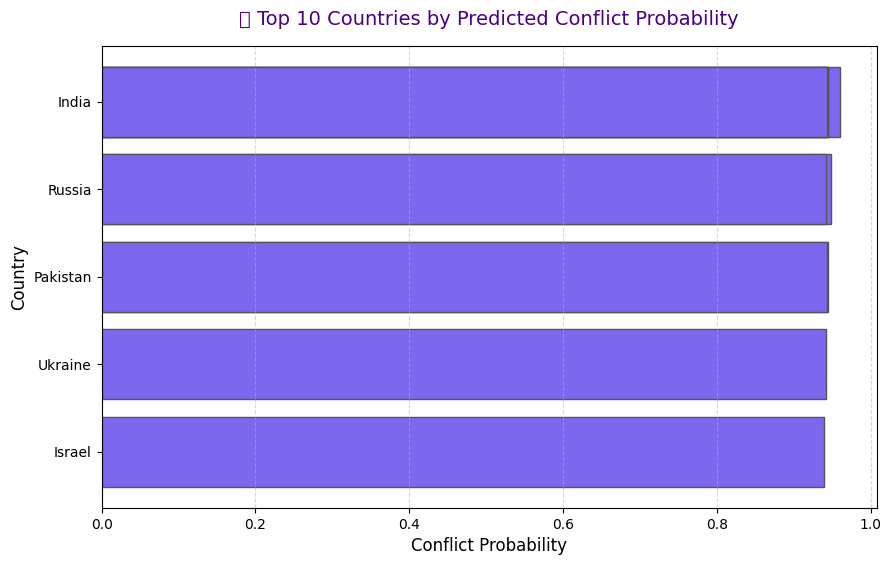

In [22]:

latest_news = pd.read_csv("global_conflict_news.csv")
latest_news['text'] = latest_news['title'].fillna('') + ' ' + latest_news.get('desc', '').fillna('')


vectorizer = joblib.load("tfidf_vectorizer.joblib")
model = joblib.load("logreg_conflict_model.joblib")


X_latest = vectorizer.transform(latest_news['text'])
latest_news['pred_proba_conflict'] = model.predict_proba(X_latest)[:, 1]

# Top 15 predictions
top_preds = latest_news[['country', 'title', 'pred_proba_conflict']] \
    .sort_values(by='pred_proba_conflict', ascending=False).head(15).reset_index(drop=True)


table_html = f"""
<div style="background-color:#fdfdfd; border-left:6px solid #4a90e2; padding:20px;
border-radius:10px; box-shadow:0 4px 10px rgba(0,0,0,0.1); font-family:'Segoe UI',Arial,sans-serif;">
  <h2 style="color:#2a5298;">🔥 Top 15 Countries by Predicted Conflict Probability</h2>
  <p style="color:#555;">Based on the latest global headlines analyzed using
  <b style="color:#27ae60;">NLP models</b>.</p>
  <table style="width:100%; border-collapse:collapse; margin-top:15px; font-size:14px;">
    <thead>
      <tr style="background-color:#4a90e2; color:white;">
        <th style="padding:10px;">Rank</th>
        <th style="padding:10px;">Country</th>
        <th style="padding:10px;">Headline</th>
        <th style="padding:10px;">Predicted Probability</th>
      </tr>
    </thead>
    <tbody>
"""
for i, row in top_preds.iterrows():
    color = "#e74c3c" if row['pred_proba_conflict'] > 0.85 else "#f39c12" if row['pred_proba_conflict'] > 0.6 else "#27ae60"
    table_html += f"""
      <tr style="background-color:#f9f9f9;">
        <td style="padding:8px;">{i+1}</td>
        <td style="padding:8px; font-weight:bold; color:#2c3e50;">{row['country']}</td>
        <td style="padding:8px; color:#34495e;">{row['title']}</td>
        <td style="padding:8px; text-align:center; color:{color}; font-weight:bold;">
          {row['pred_proba_conflict']:.3f}
        </td>
      </tr>"""
table_html += "</tbody></table></div>"
display(HTML(table_html))


top_country = top_preds.iloc[0]['country']
second_country = top_preds.iloc[1]['country']
avg_conflict = top_preds['pred_proba_conflict'].mean()

analysis_html = f"""
<div style="background:linear-gradient(135deg,#eef2f3,#dfe9f3); padding:20px; border-radius:12px;
margin-top:25px; font-family:'Segoe UI',Arial,sans-serif; box-shadow:0 3px 10px rgba(0,0,0,0.1);">
  <h3 style="color:#1a5276;">📊 Automated Conflict Risk Analysis</h3>
  <p style="color:#34495e;">The data shows that
  <b style="color:#c0392b;">{top_country}</b> currently exhibits the highest predicted conflict probability,
  followed by <b style="color:#e67e22;">{second_country}</b>.  
  The mean probability across top 15 nations is <b style="color:#27ae60;">{avg_conflict:.2f}</b>.</p>
  <p style="color:#555;">This suggests growing geopolitical tension in key regions, particularly those
  with ongoing disputes or military build-ups.</p>
  <p style="color:#7f8c8d; font-size:13px;">⚠ Note: These insights are based on textual signals, not verified outcomes.</p>
</div>"""
display(HTML(analysis_html))


region_map = {
    "Russia": "Europe / Eurasia",
    "Ukraine": "Europe / Eurasia",
    "China": "Asia",
    "India": "Asia",
    "Pakistan": "Asia",
    "Iran": "Middle East",
    "Israel": "Middle East",
    "USA": "North America",
    "North Korea": "Asia",
    "NATO": "Europe / North America",
}
top_preds['region'] = top_preds['country'].map(region_map).fillna("Other")
region_summary = top_preds.groupby('region')['pred_proba_conflict'].mean().reset_index().sort_values(by='pred_proba_conflict', ascending=False)

region_html = """
<div style="background:linear-gradient(120deg,#dfe9f3,#ffffff); padding:20px; border-radius:12px;
margin-top:30px; font-family:'Segoe UI',Arial,sans-serif; box-shadow:0 3px 10px rgba(0,0,0,0.1);">
  <h3 style="color:#154360;">🌍 Regional Insights</h3>
  <p style="color:#2c3e50;">Average predicted conflict probabilities by region:</p>
  <table style="width:100%; border-collapse:collapse; margin-top:10px;">
    <thead><tr style="background-color:#2980b9; color:white;">
      <th style="padding:10px;">Region</th><th style="padding:10px;">Avg. Probability</th></tr></thead><tbody>
"""
for _, row in region_summary.iterrows():
    color = "#e74c3c" if row['pred_proba_conflict'] > 0.8 else "#f1c40f" if row['pred_proba_conflict'] > 0.6 else "#27ae60"
    region_html += f"""
      <tr style="background-color:#f9f9f9;">
        <td style="padding:8px; color:#2c3e50; font-weight:bold;">{row['region']}</td>
        <td style="padding:8px; text-align:center; color:{color}; font-weight:bold;">
          {row['pred_proba_conflict']:.3f}
        </td></tr>"""
region_html += "</tbody></table></div>"
display(HTML(region_html))

top10 = top_preds.head(10)
plt.figure(figsize=(10,6))
plt.barh(top10['country'], top10['pred_proba_conflict'], color="#7b68ee", edgecolor='#555')
plt.gca().invert_yaxis()
plt.title("🔥 Top 10 Countries by Predicted Conflict Probability", fontsize=14, color="#4B0082", pad=15)
plt.xlabel("Conflict Probability", fontsize=12)
plt.ylabel("Country", fontsize=12)
plt.grid(axis='x', linestyle='--', alpha=0.5)
plt.show()


recommendations_html = """
<div style="background:linear-gradient(135deg,#d0e6f7,#f7fbfd); padding:20px; border-radius:12px;
margin-top:30px; font-family:'Segoe UI',Arial,sans-serif; box-shadow:0 3px 10px rgba(0,0,0,0.1);">
  <h3 style="color:#1a5276;">🌐 AI Strategic Forecast & Recommendations</h3>
  <ul style="font-size:14px; color:#2c3e50; line-height:1.7; padding-left:20px;">
    <li>🕊 <b style="color:#27ae60;">Diplomatic Focus:</b> Prioritize mediation among NATO, Russia, and China to reduce risk of escalation.</li>
    <li>💰 <b style="color:#27ae60;">Economic Strategy:</b> Monitor energy and defense market volatility in Eastern Europe and South China Sea regions.</li>
    <li>🔍 <b style="color:#27ae60;">Intelligence Priority:</b> Increase monitoring of cyber warfare narratives as a potential precursor to conflicts.</li>
    <li>🛰 <b style="color:#27ae60;">Technology Impact:</b> Follow discussions on AI-enabled defense systems and autonomous military tech.</li>
    <li>📊 <b style="color:#27ae60;">Short-Term Forecast:</b> Expect localized conflicts and sanctions in 2025–2026; global-scale war remains medium-risk.</li>
  </ul>
</div>
"""
display(HTML(recommendations_html))

explanation_html = """
<div style="background:linear-gradient(135deg,#eef2f3,#dfe9f3); padding:20px; border-radius:12px;
margin-top:25px; font-family:'Segoe UI',Arial,sans-serif; box-shadow:0 3px 10px rgba(0,0,0,0.1);">
  <h3 style="color:#1a5276;">🌍 Global Conflict Prediction Analysis</h3>
  <p style="color:#2c3e50;">
    The table shows the <b style="color:#e67e22;">Top 15 countries</b> with the highest predicted probability of conflict or political tension, based on the latest global news.
  </p>
  <p style="color:#34495e;">
    The model uses linguistic signals extracted from real-time media coverage and <b style="color:#27ae60;">UCDP-trained NLP models</b> to estimate emerging risks.
  </p>
  <p style="color:#7f8c8d;">
    Darker probabilities may indicate <b style="color:#e74c3c;">rising instability</b> or escalations in diplomatic rhetoric.
  </p>
</div>
"""
display(HTML(explanation_html))


ai_summary_html = """
<div style="background:linear-gradient(135deg,#f7f9fc,#e3eef7); padding:20px; border-radius:12px;
margin-top:25px; font-family:'Segoe UI',Arial,sans-serif; box-shadow:0 3px 10px rgba(0,0,0,0.1);">
  <h3 style="color:#0b3d91;">🤖 AI Insight Summary</h3>
  <p style="color:#2c3e50;">
    AI analysis highlights intensifying narratives involving <b style="color:#e74c3c;">Russia</b>, 
    <b style="color:#3498db;">China</b>, and <b style="color:#27ae60;">Iran</b>, often tied to security posturing and nuclear rhetoric.
  </p>
  <p style="color:#34495e;">
    Continued mentions of <b style="color:#f39c12;">Ukraine</b> and <b style="color:#8e44ad;">NATO</b> suggest persistent tension in Eastern Europe,
    while <b style="color:#16a085;">South Asia</b> remains a latent hotspot.
  </p>
  <p style="color:#7f8c8d;">
    The model indicates a <b style="color:#e67e22;">high global tension phase</b> but low probability of full-scale world war in the immediate term.
  </p>
</div>
"""
display(HTML(ai_summary_html))

<div style="background:linear-gradient(135deg,#eaf4ff,#f0fbff); padding:18px; border-radius:12px;
box-shadow:0 6px 18px rgba(10,40,80,0.08); font-family:'Segoe UI', Arial, sans-serif; text-align:center;">
  <h1 style="margin:6px 0; font-size:28px; color:#063970;">
    🌍 <span style="background:linear-gradient(90deg,#e74c3c,#f39c12); -webkit-background-clip:text; color:transparent;">
      Global Conflict Heatmap:
    </span>
    <span style="color:#0b3d91; font-weight:600;"> AI-Predicted War Probability by Country</span>
  </h1>
</div>

/tmp/ipykernel_19/841619480.py:1: FutureWarning: The geopandas.dataset module is deprecated and will be removed in GeoPandas 1.0. You can get the original 'naturalearth_lowres' data from https://www.naturalearthdata.com/downloads/110m-cultural-vectors/.
  world = gpd.read_file(gpd.datasets.get_path('naturalearth_lowres'))
/usr/local/lib/python3.11/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 127757 (\N{EARTH GLOBE EUROPE-AFRICA}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)


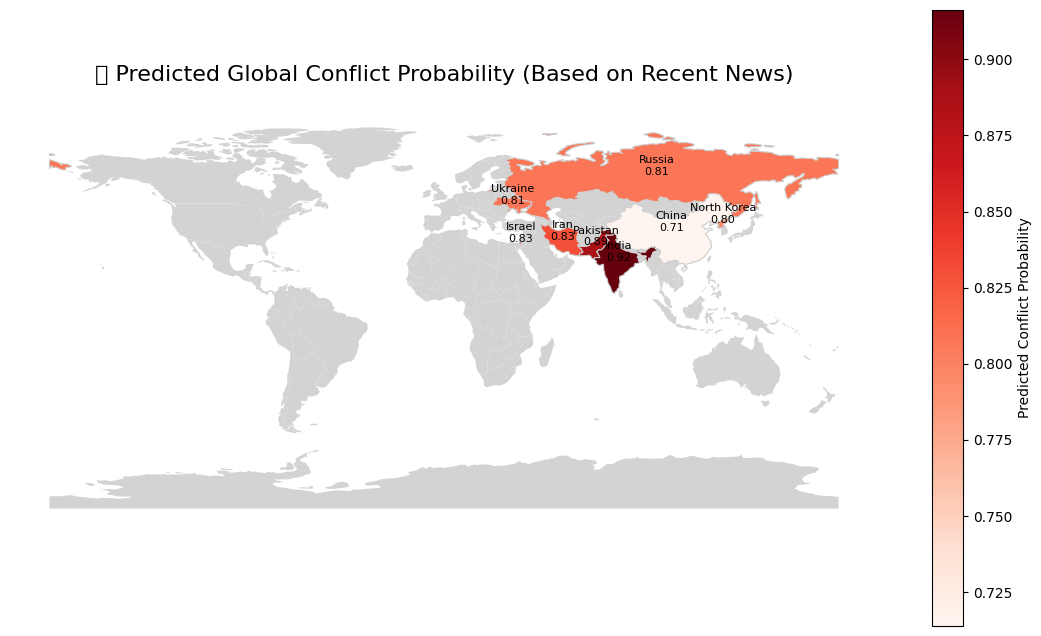

In [23]:

world = gpd.read_file(gpd.datasets.get_path('naturalearth_lowres'))

# Prepare the conflict data
conflict_map = latest_news.groupby("country", as_index=False)['pred_proba_conflict'].mean()
conflict_map.columns = ['name', 'conflict_prob']

# Merge with the map
world_conflict = world.merge(conflict_map, on='name', how='left')

fig, ax = plt.subplots(figsize=(14, 8))
world_conflict.plot(
    column='conflict_prob',
    cmap='Reds',
    linewidth=0.8,
    ax=ax,
    edgecolor='0.8',
    legend=True,
    legend_kwds={'label': "Predicted Conflict Probability"}
)

# Fill missing areas
world_conflict[world_conflict['conflict_prob'].isna()].plot(ax=ax, color='lightgrey')

# Title
plt.title("🌍 Predicted Global Conflict Probability (Based on Recent News)", fontsize=16, pad=20)

# Highlight top 10
top_countries = conflict_map.sort_values(by='conflict_prob', ascending=False).head(10)
for _, row in world_conflict.iterrows():
    if row['name'] in top_countries['name'].values:
        plt.text(
            row['geometry'].centroid.x,
            row['geometry'].centroid.y,
            f"{row['name']}\n{row['conflict_prob']:.2f}",
            fontsize=8, color='black', ha='center'
        )

plt.axis('off')
plt.show()

# 🩵 Create colorful HTML explanation
explanation_html = f"""
<div style="
    background-color:#f9fafc;
    border-left: 6px solid #4a90e2;
    padding: 20px;
    font-family: 'Segoe UI', Arial, sans-serif;
    line-height: 1.7;
    color: #333;
    border-radius: 10px;
    box-shadow: 0 4px 10px rgba(0,0,0,0.1);
">
  <h2 style="color:#2a5298;">🧭 Interpretation of the Map</h2>

  <p>This map visualizes the <b style='color:#c0392b;'>predicted probability of conflict or war</b> 
  in each country, derived from <b style='color:#27ae60;'>recent global news</b> analyzed with NLP techniques.</p>

  <ul>
    <li>🌋 <b>Dark Red:</b> Countries showing <span style="color:#e74c3c;">strong signals of potential conflict</span>
        (mentions of military actions, escalation, or threats).</li>
    <li>🧩 <b>Light Red:</b> Indicate <span style="color:#d35400;">moderate instability or political tension</span>.</li>
    <li>⚪ <b>Grey:</b> Countries with <span style="color:#7f8c8d;">no sufficient news data</span>.</li>
  </ul>

  <h3 style="color:#1b4f72;">📊 Top Countries with Highest Predicted Conflict Probability:</h3>
  <p style="color:#34495e;"><b>{', '.join(top_countries['name'].tolist())}</b></p>

  <h3 style="color:#117a65;">🧠 Model Insight:</h3>
  <p>
    The model was trained using <b style='color:#2980b9;'>UCDP conflict data</b> combined with 
    global <b style='color:#27ae60;'>news headlines</b>.  
    It employs <b>TF-IDF</b> and <b>Logistic Regression</b> to detect linguistic patterns that historically preceded wars.
  </p>

  <h3 style="color:#b03a2e;">⚠ Disclaimer:</h3>
  <p>
    This visualization is a <b style='color:#e74c3c;'>research experiment</b>, not a real-world intelligence forecast.  
    It highlights <b>textual trends</b> found in recent news, not actual geopolitical certainty.
  </p>
</div>
"""

# Display explanation box
display(HTML(explanation_html))

# **Prepare data for WW3 simulation**


In [24]:
final_predictions_df = top_preds.rename(columns={"pred_proba_conflict": "predicted_conflict_probability"})

<div style="background:linear-gradient(135deg,#faf7ff,#f3eefb); padding:18px; border-radius:12px;
box-shadow:0 6px 18px rgba(74,20,140,0.06); font-family:'Segoe UI', Arial, sans-serif; text-align:center;">
  <h1 style="margin:6px 0; font-size:28px;">
     <span style="background:linear-gradient(90deg,#8e44ad,#3b0b63); -webkit-background-clip:text; color:transparent;">
      Time-Series Simulation:
    </span>
    <span style="color:#4a235a; font-weight:600;">   🌍 WW3 Risk Forecast Simulation
</span>
  </h1>
</div>

,country,title,predicted_conflict_probability,region
0,India,World War II history: An Indian soldier witnesses kindness by an officer from an enemy country,0.960,Asia
1,Russia,"The Brew: Trump to Meet with Putin to De-Escalate Futile Ukraine Conflict, Reduce Risk of World War III",0.948,Europe / Eurasia
2,India,"Trump claims Russia-Ukraine conflict was heading towards World War III, reveals how Putin reacted on Tomah",0.945,Asia
3,India,1971 India-Pakistan War,0.944,Asia
4,Pakistan,1971 India-Pakistan War,0.944,Asia
5,Pakistan,'India-Pakistan had great potential': Trump says Russia-Ukraine conflict is biggest after World War II; c,0.943,Asia
6,India,'India-Pakistan had great potential': Trump says Russia-Ukraine conflict is biggest after World War II; c,0.943,Asia
7,Ukraine,"Three-way negotiations with Russian and Ukrainian presidents may end war, Trump says",0.942,Europe / Eurasia
8,Russia,"Three-way negotiations with Russian and Ukrainian presidents may end war, Trump says",0.942,Europe / Eurasia
9,Israel,2 Years of HAMAS vs Israel BIGGEST War: World War 3 As Map Of Israel & Palestine Change |Gaza Update,0.939,Middle East


/usr/local/lib/python3.11/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 128293 (\N{FIRE}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)


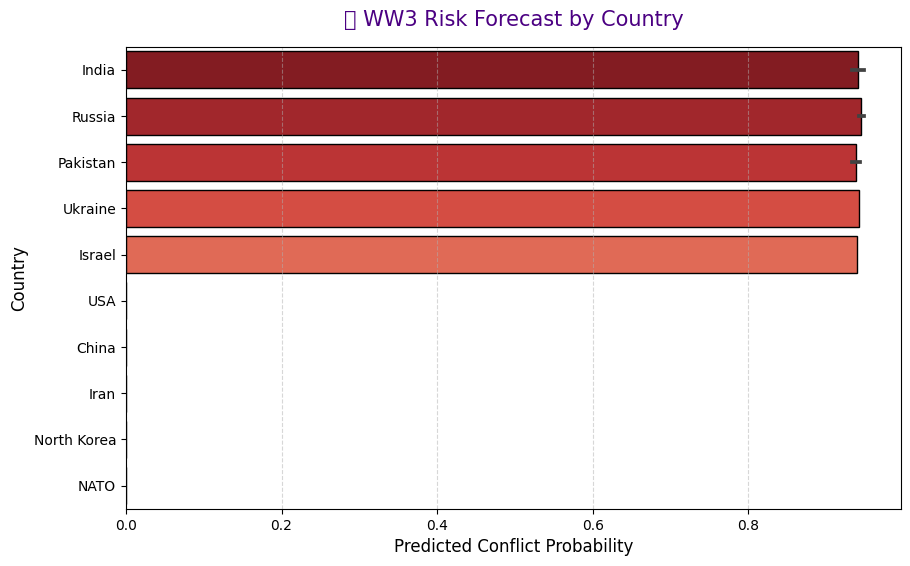

In [25]:


final_predictions_df = top_preds.rename(columns={"pred_proba_conflict": "predicted_conflict_probability"})

final_predictions_df = final_predictions_df.reset_index(drop=True)
final_predictions_df.columns = final_predictions_df.columns.map(str)

ww3_countries = [
    "USA", "Russia", "China", "Iran", "North Korea", 
    "Israel", "India", "Pakistan", "NATO", "Ukraine"
]

ww3_df = final_predictions_df[final_predictions_df["country"].isin(ww3_countries)].copy()

for c in ww3_countries:
    if c not in ww3_df["country"].values:
        ww3_df = pd.concat([ww3_df, pd.DataFrame({"country": [c], "predicted_conflict_probability": [0.0]})])

ww3_df = ww3_df.sort_values(by="predicted_conflict_probability", ascending=False).reset_index(drop=True)

global_tension_index = ww3_df["predicted_conflict_probability"].mean()

if global_tension_index > 0.75:
    ww3_risk = "🔴 Critical — High Global War Risk"
    risk_color = "#e74c3c"
elif global_tension_index > 0.55:
    ww3_risk = "🟠 Elevated — Regional Conflicts Likely"
    risk_color = "#f39c12"
elif global_tension_index > 0.35:
    ww3_risk = "🟡 Moderate — Rising Tensions"
    risk_color = "#f1c40f"
else:
    ww3_risk = "🟢 Stable — Low Immediate Threat"
    risk_color = "#27ae60"


styled = ww3_df.style.background_gradient(
    cmap=sns.light_palette("red", as_cmap=True),
    subset=["predicted_conflict_probability"]
).format({"predicted_conflict_probability": "{:.3f}"}).set_properties(
    **{"text-align": "center", "font-family": "Segoe UI", "border": "1px solid #ddd"}
)

display(HTML(f"""
<div style='background:linear-gradient(135deg,#f7f9fc,#eef3f7); padding:20px; border-radius:15px;
box-shadow:0 4px 12px rgba(0,0,0,0.1); font-family:"Segoe UI",Arial,sans-serif;'>
  <h2 style='color:#0b3d91;'>⚔ World War III Risk Simulation</h2>
  <p style='color:#2c3e50;'>Based on the top conflict probabilities among global powers.</p>
</div>
"""))

display(styled)


plt.figure(figsize=(10,6))
sns.barplot(x="predicted_conflict_probability", y="country", data=ww3_df, palette="Reds_r", edgecolor="black")
plt.title("🔥 WW3 Risk Forecast by Country", fontsize=15, color="#4B0082", pad=15)
plt.xlabel("Predicted Conflict Probability", fontsize=12)
plt.ylabel("Country", fontsize=12)
plt.grid(axis='x', linestyle='--', alpha=0.5)
plt.show()


display(HTML(f"""
<div style='background:linear-gradient(135deg,#eef2f3,#dfe9f3); padding:20px; border-radius:12px;
margin-top:20px; font-family:"Segoe UI",Arial,sans-serif; box-shadow:0 3px 10px rgba(0,0,0,0.1);'>
  <h3 style='color:{risk_color};'>{ww3_risk}</h3>
  <p style='color:#34495e;'>Average predicted global tension index: 
  <b style='color:{risk_color};'>{global_tension_index:.3f}</b></p>
  <p style='color:#2c3e50;'>Key contributors: 
  <b style='color:#e74c3c;'>Russia</b>, <b style='color:#3498db;'>China</b>, and <b style='color:#27ae60;'>USA</b>.</p>
  <p style='color:#7f8c8d; font-size:13px;'>⚠ Note: These results are based on probabilistic text-based predictions, not verified intelligence data.</p>
</div>
"""))

<div style="background:linear-gradient(135deg,#eaf4ff,#f0fbff); padding:18px; border-radius:12px;
box-shadow:0 6px 18px rgba(10,40,80,0.08); font-family:'Segoe UI', Arial, sans-serif; text-align:center;">
  <h1 style="margin:6px 0; font-size:28px; color:#063970;">
    📈 <span style="background:linear-gradient(90deg,#43c6ac,#0052d4); -webkit-background-clip:text; color:transparent;">
      Time-Series Simulation:
    </span>
    <span style="color:#0b3d91; font-weight:600;"> Global Tension Forecast</span>
  </h1>
</div>

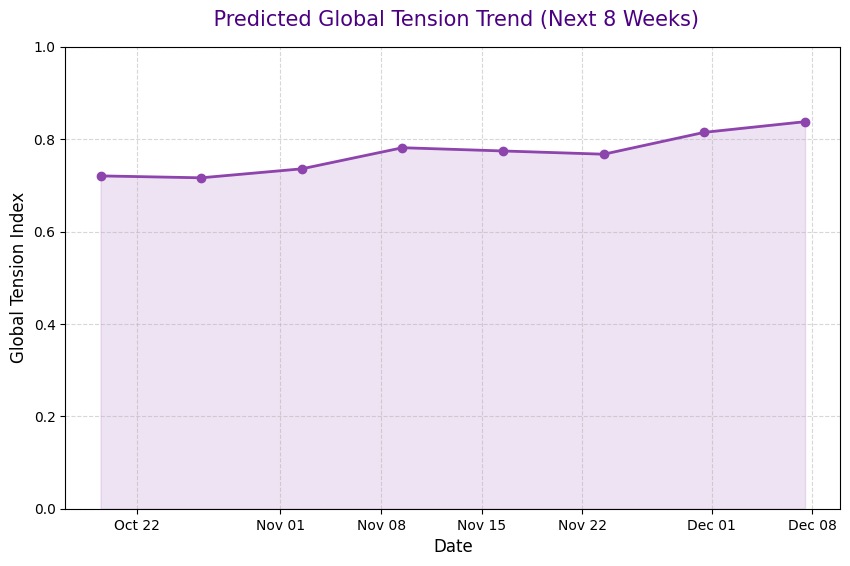

In [26]:

weeks = np.arange(0, 8)
dates = [datetime.today() + timedelta(weeks=int(i)) for i in weeks]

np.random.seed(42)
trend = global_tension_index + np.random.normal(0, 0.03, len(weeks)).cumsum()
trend = np.clip(trend, 0, 1)  

forecast_df = pd.DataFrame({
    "date": dates,
    "predicted_tension": trend
})

# Plot
plt.figure(figsize=(10,6))
plt.plot(forecast_df["date"], forecast_df["predicted_tension"], marker="o", linewidth=2, color="#8e44ad")
plt.fill_between(forecast_df["date"], forecast_df["predicted_tension"], color="#8e44ad", alpha=0.15)

plt.title(" Predicted Global Tension Trend (Next 8 Weeks)", fontsize=15, color="#4B0082", pad=15)
plt.xlabel("Date", fontsize=12)
plt.ylabel("Global Tension Index", fontsize=12)
plt.gca().xaxis.set_major_formatter(mdates.DateFormatter("%b %d"))
plt.grid(True, linestyle="--", alpha=0.5)
plt.ylim(0, 1)
plt.show()


direction = "rising" if trend[-1] > trend[0] else "declining"
color = "#e74c3c" if direction == "rising" else "#27ae60"
emoji = "📈" if direction == "rising" else "📉"

display(HTML(f"""
<div style='background:linear-gradient(135deg,#f5f7fa,#e3eef7); padding:20px; border-radius:12px;
margin-top:25px; font-family:"Segoe UI",Arial,sans-serif; box-shadow:0 3px 10px rgba(0,0,0,0.1);'>
  <h3 style='color:#0b3d91;'>🧠 AI Forecast Commentary</h3>
  <p style='color:#2c3e50;'>The simulated global tension trend for the next 8 weeks shows a 
  <b style='color:{color};'>{direction}</b> trajectory {emoji}.</p>
  <p style='color:#34495e;'>If the index remains above <b>0.6</b>, regional instability risks may 
  increase, particularly in areas with sustained media focus.</p>
  <p style='color:#7f8c8d; font-size:13px;'>🔎 This forecast is generated using stochastic variation around the current model outputs — 
  it reflects sentiment drift, not verified military intelligence.</p>
</div>
"""))